In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [0]:
!mkdir house_data

download the data from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [4]:
path = 'house_data/'
# Load home price data
df = pd.read_csv(path+'train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Regression including intercept $\beta_0$

In [5]:
m = sm.OLS(df['SalePrice'],sm.add_constant(df[['GrLivArea','OverallCond','TotRmsAbvGrd']]))
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     506.8
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          1.94e-225
Time:                        00:40:22   Log-Likelihood:                -18022.
No. Observations:                1460   AIC:                         3.605e+04
Df Residuals:                    1456   BIC:                         3.607e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.773e+04   9751.913      4.894   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


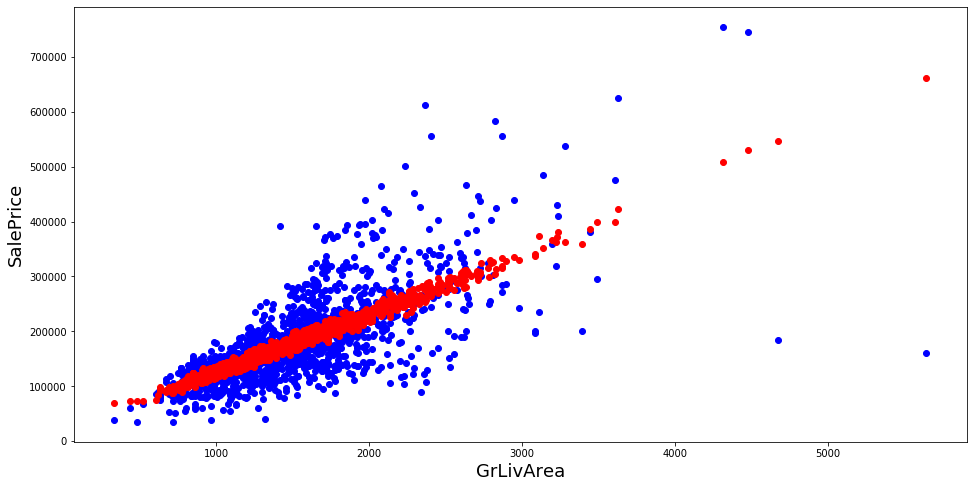

In [7]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(df['GrLivArea'],df['SalePrice'],'bo')
plt.plot(df['GrLivArea'],r.predict(sm.add_constant(df[['GrLivArea','OverallCond','TotRmsAbvGrd']])),'ro')
plt.xlabel('GrLivArea',fontsize = 18)
plt.ylabel('SalePrice',fontsize = 18)
plt.show()

Regression **without** intercept $\beta_0$

In [8]:
m = sm.OLS(df['SalePrice'],df[['GrLivArea','OverallCond','TotRmsAbvGrd']])
r = m.fit()
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              5560.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                        0.00
Time:                        00:40:50   Log-Likelihood:                         -18034.
No. Observations:                1460   AIC:                                  3.607e+04
Df Residuals:                    1457   BIC:                                  3.609e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

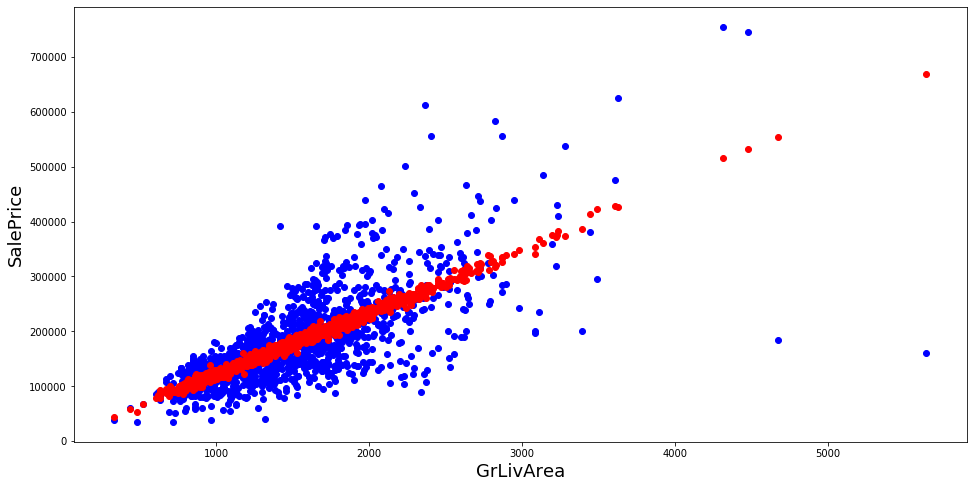

In [9]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(df['GrLivArea'],df['SalePrice'],'bo')
plt.plot(df['GrLivArea'],r.predict(df[['GrLivArea','OverallCond','TotRmsAbvGrd']]),'ro')
plt.xlabel('GrLivArea',fontsize = 18)
plt.ylabel('SalePrice',fontsize = 18)
plt.show()

## **Just by observing visually the predictions don't change much, but $R^2$ does change significantly. Explain why this happens and what is the math behind it.**

The strange $R^2$ is the result of difference between formulas for calculating it with an intercept present and without. 

$R^2$ of a linear model with an intercept is calculated with the follwoing formula: 

$$
  1 - \frac{
   \sum_{i} (y_{i} - \hat{y_{i}}) ^{2}
  } 
  {
   \sum_{i} (y_{i} - \bar{y}) ^{2}
  }, 
$$

where $y$ is the response variable that our model predicts, $\hat{y}$ is the predicted value and $\bar{y}$ is the mean value of the response variable.

On the other hand, the  $R^2$ of a model that has no intercept and passes through origin (0, 0) is the following:

$$
  1 - \frac{
   \sum_{i} (y_{i} - \hat{y_{i}}) ^{2}
  } 
  {
   \sum_{i} (y_{i}) ^{2}
  }, 
$$

where $\bar{y}$, the mean value is not present.

The reason why computing the mean does not make sense anymore is because the fit is passing through zero and we are declaring that the expected value of $y$ when $x$ is equal to 0 is 0. Typically, the sum of squares of $y$ accounted for by the intercept are not included in the total sum of squares. That is the model is predicting the sum of squares left over after taking out the intercept. When the intercept (or constant term) is left off and it does not have a true zero effect, the total sum of squares being modelled is increased. The second formula for a model is calculated exactly as described, and has a generally larger sum in the denominator (SST), resulting in a smaller fraction and a higher $R^2$ value, when subtracted from 1.